# Segundo examen Práctico de IA (Semestre 2025-1)

**Tema:** Redes Neuronales Recurrentes (RNNs) y Modelado Generativo (Autoencoders y GANs)

**Instrucciones:**
- Resuelve los siguientes dos ejercicios
- Puedes utilizar Python y las librerías estándar de aprendizaje automático como TensorFlow.
- Asegúrate de comentar tu código donde sea necesario para explicar tus decisiones.

---

## Datos Proporcionados:

Para completar este examen, se te proporcionan los siguientes datos:

- **Ejercicio 1:** Un archivo de texto `cuentos.txt` que contiene una colección de cuentos cortos escritos especialmente para este examen.
- **Ejercicio 2:** Un conjunto de imágenes `simbolos.npy`, que contiene 1000 imágenes de 28x28 píxeles en escala de grises de símbolos abstractos generados para este examen.

Los datos están disponibles en el mismo directorio que este examen.

**Nota:** A continuación, se incluyen instrucciones para generar estos datos en caso de que no los tengas disponibles.

---


### Generación de `cuentos.txt` y visualización de algunos cuentos:

In [16]:
# Generar 100 cuentos variados y guardarlos en 'cuentos.txt'
import random

# Lista de personajes, lugares, objetos y moralejas para crear variaciones
personajes = ['Alicia', 'Pedro', 'María', 'Juan', 'Lucía', 'Carlos', 'El Gato con Botas', 'Caperucita Roja', 'Hansel', 'Gretel']
lugares = ['un bosque encantado', 'una ciudad futurista', 'un reino submarino', 'una montaña misteriosa', 'una isla desierta']
objetos = ['una varita mágica', 'un mapa del tesoro', 'una espada legendaria', 'un libro de hechizos', 'una lámpara mágica']
moralejas = [
    'la verdadera riqueza está en el corazón',
    'el valor y la amistad son las fuerzas más poderosas',
    'la honestidad es la mejor política',
    'nunca juzgues un libro por su portada',
    'la perseverancia conduce al éxito'
]

cuentos_list = []

for i in range(100):  # Generar 100 cuentos
    personaje = random.choice(personajes)
    lugar = random.choice(lugares)
    objeto = random.choice(objetos)
    moraleja = random.choice(moralejas)

    cuento = f"""
    Cuento {i+1}:
    Había una vez {personaje} que vivía en {lugar}. Un día, encontró {objeto} que cambió su vida para siempre. A través de aventuras y desafíos, {personaje} aprendió que {moraleja}.
    """
    cuentos_list.append(cuento)

# Unir todos los cuentos en un solo texto
cuentos = '\n'.join(cuentos_list)

# Guardar el texto en 'cuentos.txt'
with open('cuentos.txt', 'w', encoding='utf-8') as f:
    f.write(cuentos)

# Mostrar los primeros 3 cuentos
print('--- Muestra de cuentos generados ---\n')
for cuento in cuentos_list[:3]:
    print(cuento)


--- Muestra de cuentos generados ---


    Cuento 1:
    Había una vez Hansel que vivía en una isla desierta. Un día, encontró una varita mágica que cambió su vida para siempre. A través de aventuras y desafíos, Hansel aprendió que el valor y la amistad son las fuerzas más poderosas.
    

    Cuento 2:
    Había una vez Hansel que vivía en un bosque encantado. Un día, encontró un mapa del tesoro que cambió su vida para siempre. A través de aventuras y desafíos, Hansel aprendió que la verdadera riqueza está en el corazón.
    

    Cuento 3:
    Había una vez Hansel que vivía en una montaña misteriosa. Un día, encontró una varita mágica que cambió su vida para siempre. A través de aventuras y desafíos, Hansel aprendió que la verdadera riqueza está en el corazón.
    


### Generación de `simbolos.npy` y visualización de algunas imágenes:

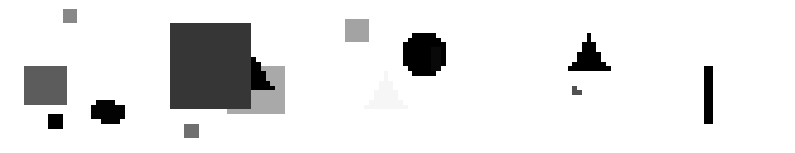

In [5]:
# Generar 1000 imágenes de símbolos abstractos y guardarlas en 'simbolos.npy'
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import random_shapes

simbolos = []

for _ in range(2000):
    img, _ = random_shapes(
        (28, 28),
        max_shapes=5,
        min_shapes=1,
        max_size=20,
        num_channels=1,  # Cambiado 'multichannel' a 'num_channels'
        intensity_range=((0, 255)),
        allow_overlap=True
    )
    img = img.astype('float32').squeeze() / 255.0  # Asegurar que la imagen es 2D
    simbolos.append(img)

simbolos = np.array(simbolos)

# Guardar las imágenes en 'simbolos.npy'
np.save('simbolos.npy', simbolos)

# Visualizar los primeros 5 símbolos
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(simbolos[i], cmap='gray')
    axes[i].axis('off')
plt.show()

---

## Ejercicio 1: Generación de Texto con Redes Neuronales Recurrentes

Utilizando el archivo `cuentos.txt`, tu tarea es construir un modelo de red neuronal recurrente que pueda generar texto en el estilo de los cuentos proporcionados.

### Tareas:

1. **Preprocesamiento de Datos:**

   - Carga el texto desde `cuentos.txt` y realiza el preprocesamiento necesario.
   - Continúa con las instrucciones especificadas en el enunciado.

In [39]:
import numpy as np
import tensorflow as tf

# Cargar el texto desde 'cuentos.txt'
with open('cuentos.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Preprocesar el texto: convertirlo a minúsculas
text = text.lower()

# Crear un conjunto de palabras únicas en el texto
words = text.split()
vocab = sorted(set(words))
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = np.array(vocab)

# Convertir el texto en una secuencia de enteros basados en las palabras
text_as_int = np.array([word2idx[word] for word in words])

# Definir la longitud de las secuencias
seq_length = 5  # Longitud de las secuencias de palabras
examples_per_epoch = len(words) // (seq_length + 1)

# Crear ejemplos y etiquetas para el entrenamiento
word_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = word_dataset.batch(seq_length + 1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)


In [40]:
# Tamaño del buffer y batch
BATCH_SIZE = 64
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Definir el tamaño del vocabulario y las dimensiones de la capa de embedding
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

# Crear el modelo de SimpleRNN
def build_model(vocab_size, embedding_dim, rnn_units):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_shape=(None,)),
        tf.keras.layers.SimpleRNN(rnn_units, return_sequences=True, stateful=False),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model

model = build_model(vocab_size, embedding_dim, rnn_units)

# Compilar el modelo
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))


In [41]:
# Definir número de épocas
EPOCHS = 10

# Entrenar el modelo
history = model.fit(dataset, epochs=EPOCHS)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.7029
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5129
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6362 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2351 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9599 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8334 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6945 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6289 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5743 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5345 


In [44]:
# Función para generar texto basado en palabras
def generate_text(model, start_string):
    num_generate = 50  # Número de palabras a generar
    input_eval = [word2idx[word] for word in start_string.split()]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []

    # Restablecer los estados de la capa SimpleRNN
    model.layers[1].reset_states()  # Suponiendo que la capa SimpleRNN es la segunda en el modelo

    # Generar texto palabra por palabra
    for _ in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()
        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2word[predicted_id])

    return start_string + ' ' + ' '.join(text_generated)

# Ejemplo de generación de texto
print(generate_text(model, start_string="había una vez"))


había una vez gretel mapa el corazón. espada que vivía en un día, encontró una vez 100: 16: 56: y desafíos, 41: al desafíos, encontró un día, encontró un día, encontró una vez pedro 63: 85: 17: 99: 46: juzgues un libro su vida para siempre. a través de aventuras varita y desafíos,


---

## Ejercicio 2: Reconstrucción y Generación de Imágenes con Autoencoders y GANs

Utilizando el conjunto de imágenes `simbolos.npy`, que contiene 1000 imágenes de símbolos abstractos, explora el uso de Autoencoders y Generative Adversarial Networks (GANs) para la reconstrucción y generación de imágenes.

### Tareas:

1. **Autoencoder:**

   - Carga las imágenes desde `simbolos.npy` y normalízalas al rango [0, 1].
   - Continúa con las instrucciones especificadas en el enunciado.

In [36]:
# Importar librerías necesarias
import numpy as np
import tensorflow as tf

# Cargar las imágenes desde 'simbolos.npy'
simbolos = np.load('simbolos.npy')


In [37]:
from tensorflow.keras import layers, models

# Modelo de Autoencoder basado en convoluciones
input_img = tf.keras.Input(shape=(28, 28, 1))

# Codificador
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decodificador
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


# Entrenar el Autoencoder
autoencoder.fit(simbolos, simbolos, epochs=100, batch_size=64, validation_split=0.2)



Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.4826 - val_loss: 0.2507
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1966 - val_loss: 0.1427
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1269 - val_loss: 0.1213
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1124 - val_loss: 0.1128
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1067 - val_loss: 0.1080
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1031 - val_loss: 0.1053
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0992 - val_loss: 0.1002
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0970 - val_loss: 0.0972
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0914 - val_loss: 0.0951
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0918 - val_loss: 0.0927
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0887 - val_loss: 0.0905
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


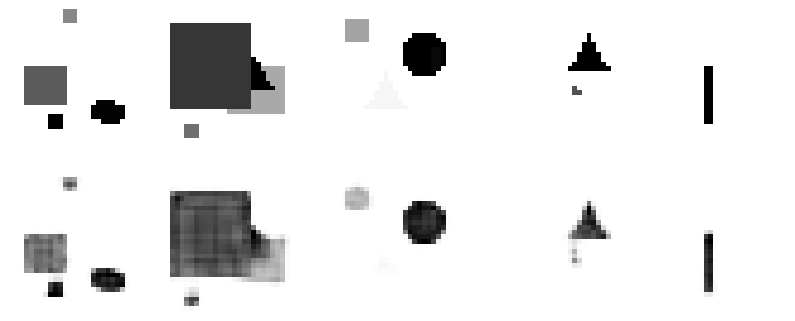

In [38]:
import matplotlib.pyplot as plt

# Generar imágenes reconstruidas
reconstructed_imgs = autoencoder.predict(simbolos)

# Mostrar algunas imágenes originales y sus reconstrucciones
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Mostrar imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(simbolos[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Mostrar imagen reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()
